# SPSS Modelerのバランス・ノードをPythonで書き換える。


■利用データ<BR>
ローン審査での、顧客の属性と判定したリスクの入ったデータを使います。Riskが１の場合はリスクの高い顧客、0はリスクの低い顧客を示しています。。

CustID:顧客番号
Age:年齢
Car_loans：車のローンランク
Credit_cards:クレジットカード利用ランク
Education:教育ランク
Income:収入ランク
Risk:リスクありなし
![image.png](https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/223763/bc7c63ee-3924-93e7-dd50-025f44bdd1dd.png)


In [1]:
!wget https://github.com/hkwd/200611Modeler2Python/raw/master/data/credit_risk.csv

'wget' は、内部コマンドまたは外部コマンド、
操作可能なプログラムまたはバッチ ファイルとして認識されていません。


In [2]:
#データの読み込み
import types
import pandas as pd

pd.options.display.max_rows = 10
#print(pd.options.display.max_rows)

import pandas as pd
df = pd.read_csv('credit_risk.csv')
print(df.dtypes)
df

CustID          int64
Age             int64
Car_loans       int64
Credit_cards    int64
Education       int64
Income          int64
Risk            int64
dtype: object


,CustID,Age,Car_loans,Credit_cards,Education,Income,Risk
0,1,28,1,1,2,3,0
1,2,45,2,2,2,2,1
2,3,23,1,1,1,2,0
3,4,29,1,1,2,2,0
4,5,27,1,1,1,2,0
...,...,...,...,...,...,...,...
2459,2460,36,2,2,2,2,0
2460,2461,32,1,2,2,1,0
2461,2462,29,1,2,1,1,0
2462,2463,21,1,2,2,2,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2464 entries, 0 to 2463
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   CustID        2464 non-null   int64
 1   Age           2464 non-null   int64
 2   Car_loans     2464 non-null   int64
 3   Credit_cards  2464 non-null   int64
 4   Education     2464 non-null   int64
 5   Income        2464 non-null   int64
dtypes: int64(6)
memory usage: 115.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2464 entries, 0 to 2463
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Risk    2464 non-null   int64
dtypes: int64(1)
memory usage: 19.4 KB
None
Risk
0    1864
1     600
dtype: int64


<AxesSubplot:xlabel='Risk'>

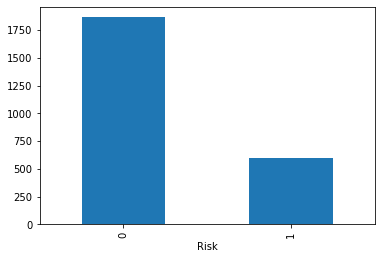

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
df_x=df.drop(['Risk'],axis=1)
df_y=df[['Risk']]
print(df_x.info())
print(df_y.info())

df_risk=df_y.groupby('Risk').size()
print(df_risk)
df_risk.plot.bar()


# ① アンダーサンプリング


In [4]:
#アンダーサンプリング
from imblearn.under_sampling import RandomUnderSampler
sampler = RandomUnderSampler(random_state=1)
x_resampled, y_resampled = sampler.fit_resample(df_x,df_y)
print(x_resampled.info())
print(y_resampled.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   CustID        1200 non-null   int64
 1   Age           1200 non-null   int64
 2   Car_loans     1200 non-null   int64
 3   Credit_cards  1200 non-null   int64
 4   Education     1200 non-null   int64
 5   Income        1200 non-null   int64
dtypes: int64(6)
memory usage: 56.4 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Risk    1200 non-null   int64
dtypes: int64(1)
memory usage: 9.5 KB
None


Risk
0    600
1    600
dtype: int64


<AxesSubplot:xlabel='Risk'>

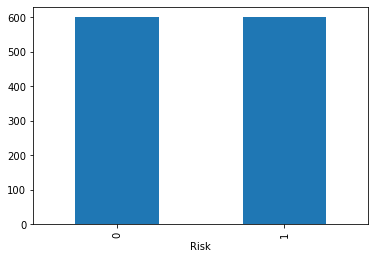

In [5]:
df_risk=y_resampled.groupby('Risk').size()
print(df_risk)
df_risk.plot.bar()

# ② オーバーサンプリング

In [6]:
#オーバーサンプリング
from imblearn.over_sampling  import RandomOverSampler
sampler = RandomOverSampler(random_state=1)
x_resampled, y_resampled = sampler.fit_resample(df_x,df_y)
print(x_resampled.info())
print(y_resampled.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3728 entries, 0 to 3727
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   CustID        3728 non-null   int64
 1   Age           3728 non-null   int64
 2   Car_loans     3728 non-null   int64
 3   Credit_cards  3728 non-null   int64
 4   Education     3728 non-null   int64
 5   Income        3728 non-null   int64
dtypes: int64(6)
memory usage: 174.9 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3728 entries, 0 to 3727
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Risk    3728 non-null   int64
dtypes: int64(1)
memory usage: 29.2 KB
None


Risk
0    1864
1    1864
dtype: int64


<AxesSubplot:xlabel='Risk'>

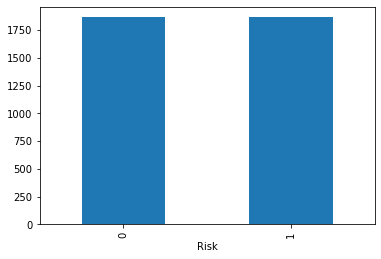

In [7]:
df_risk=y_resampled.groupby('Risk').size()
print(df_risk)
df_risk.plot.bar()

https://blog.amedama.jp/entry/imbalanced-data

In [8]:
import sys

print(sys.version)

3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]


In [9]:
print(pd.__version__)

1.0.5


In [10]:
import imblearn
print(imblearn.__version__)

0.7.0
